Closed-Form Linear Regression
Predicted Theta 0: [3.99840902]	 Expected Theta 0: 4
Predicted Theta 1: [2.90352583]	 Expected Theta 1: 3


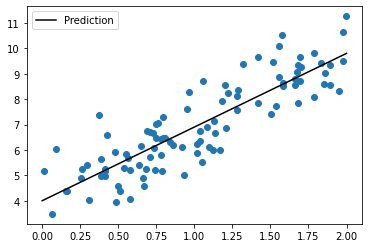

In [3]:
#Testing some linear regression and closed form parameter fitting
import numpy as np
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)
plt.scatter(X, y)

X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Closed-Form Linear Regression")
print("Predicted Theta 0: "+str(theta_best[0])+"\t Expected Theta 0: 4")
print("Predicted Theta 1: "+str(theta_best[1])+"\t Expected Theta 1: 3")

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "k-", label="Prediction")
plt.legend()

In [4]:
#Now do it with sci-kit
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#Option 1
lin_reg.fit(X,y)
# theta_best_sci = lin_reg.predict(X_new)

#Option 2 : theta_best_svd (Singular Value Decomposition)
# theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

#Option 3
# other_theta = np.linalg.pinv(X_b).dot(y)

print("Singular Value Decomposition")
print("Predicted Theta 0: "+str(lin_reg.intercept_)+"\t Expected Theta 0: 4")
print("Predicted Theta 1: "+str(lin_reg.coef_)+"\t Expected Theta 1: 3")

Singular Value Decomposition
Predicted Theta 0: [3.99840902]	 Expected Theta 0: 4
Predicted Theta 1: [[2.90352583]]	 Expected Theta 1: 3


In [5]:
#Some batch gradient descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("Batch Gradient Descent")
print("Predicted Theta 0: "+str(theta[0])+"\t Expected Theta 0: 4")
print("Predicted Theta 1: "+str(theta[1])+"\t Expected Theta 1: 3")

Batch Gradient Descent
Predicted Theta 0: [3.99840902]	 Expected Theta 0: 4
Predicted Theta 1: [2.90352583]	 Expected Theta 1: 3


In [6]:
#Some stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print("Stochastic Gradient Descent")
print("Predicted Theta 0: "+str(theta[0])+"\t Expected Theta 0: 4")
print("Predicted Theta 1: "+str(theta[1])+"\t Expected Theta 1: 3")

Stochastic Gradient Descent
Predicted Theta 0: [3.94426575]	 Expected Theta 0: 4
Predicted Theta 1: [2.93778161]	 Expected Theta 1: 3


In [7]:
#Now do it with Scikit
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print("Stochastic Gradient Descent (with Sci-Kit)")
print("Predicted Theta 0: "+str(sgd_reg.intercept_)+"\t Expected Theta 0: 4")
print("Predicted Theta 1: "+str(sgd_reg.coef_)+"\t Expected Theta 1: 3")

Stochastic Gradient Descent (with Sci-Kit)
Predicted Theta 0: [3.9886645]	 Expected Theta 0: 4
Predicted Theta 1: [2.92260079]	 Expected Theta 1: 3


Polynomial Regression
Predicted Theta 0: 0.4503491633664298	 Expected Theta 0: 0.5
Predicted Theta 1: 0.9510837994207291	 Expected Theta 1: 1.0
Predicted Theta 2: 2.1945475475969225	 Expected Theta 2: 2.0


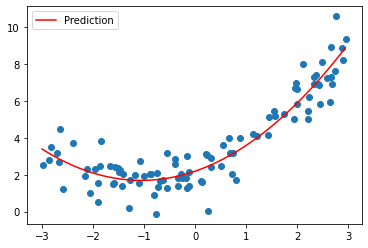

In [8]:
#Polynomial regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot()

print("Polynomial Regression")
print("Predicted Theta 0: "+str(lin_reg.coef_[0][1])+"\t Expected Theta 0: 0.5")
print("Predicted Theta 1: "+str(lin_reg.coef_[0][0])+"\t Expected Theta 1: 1.0")
print("Predicted Theta 2: "+str(lin_reg.intercept_[0])+"\t Expected Theta 2: 2.0")

X_test = [-3+(6/100)*x for x in range(100)]
pred_y = []
for x in X_test:
    pred_y.append(lin_reg.coef_[0][1]*(x**2)+lin_reg.coef_[0][0]*x+lin_reg.intercept_[0])
plt.plot(X_test, pred_y, 'r-', label="Prediction")
plt.legend()

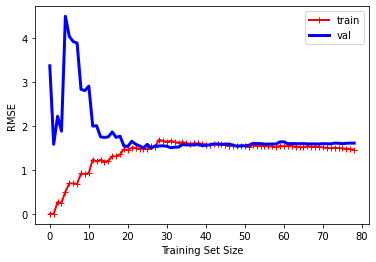

In [9]:
#Determining fitting with Learning Curves

#The following code defines a function that, given some training data, plots the learning curves of a model:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend()

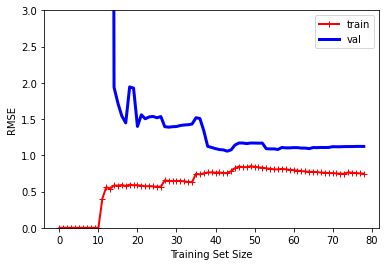

In [10]:
#How's it look for a very overfitting model? (the gap denotes overfitting)
#Works half the time
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())])

plot_learning_curves(polynomial_regression, X, y)
plt.ylim([0, 3])
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend()

In [11]:
#Do Ridge regression with closed-form and Gradient Descent
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]])[0])

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))


[5.18101442]
[5.17568524]


In [12]:
#Do Lasso regression with closed-form and Gradient Descent
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(lasso_reg.predict([[1.5]]))

sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

[5.13973197]
[5.15767557]


In [13]:
#A mix between Lasso and Ridge (Elastic Net)
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print(elastic_net.predict([[1.5]]))

[5.13800211]


In [14]:
#Early stopping (best model is when validation error starts increasing again)
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
    penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
since_last_increase = 0
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
best_model.fit(X_train_poly_scaled, y_train)
# print(best_model.predict([[1.5]]))

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=-inf, warm_start=True)

Text(0, 0.5, 'Probability')

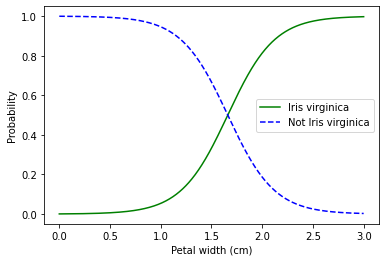

In [15]:
#Logisitic Regression with Iris dataset
from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, 3:] #petal width
y = (iris["target"] == 2).astype(np.int) #1 if Iris virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
#Decision boundary at 1.6cm

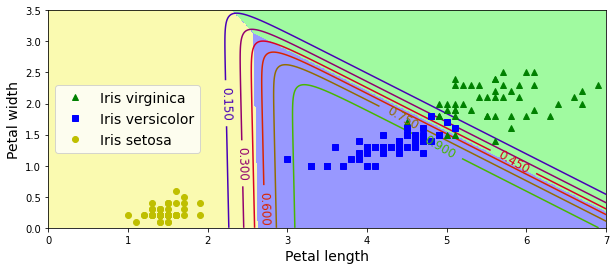

In [16]:
# Iris flowers with Softmax for multi-class
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1), )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape) 

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(
    ['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg) 
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5]) 
plt.show()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])